In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

<a name='FeatureEng'></a>
# Feature Engineering and Polynomial Regression Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in the curves shown in the graphic above. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.

<a name='PolynomialFeatures'></a>
## Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

In [ ]:
#Target data
x = np.arange(0,20,1)
#Polynomial model insted of a linear model
y = 1 + x**2
X = x.reshape((-1,1))
X.shape,y.shape

((20, 1), (20,))

In [ ]:
scale = StandardScaler()
sgdr = SGDRegressor(max_iter=1000,alpha=1e-2)
sgdr.fit(X,y)

SGDRegressor(alpha=0.01)

[14.95197331] -16.117568457520047


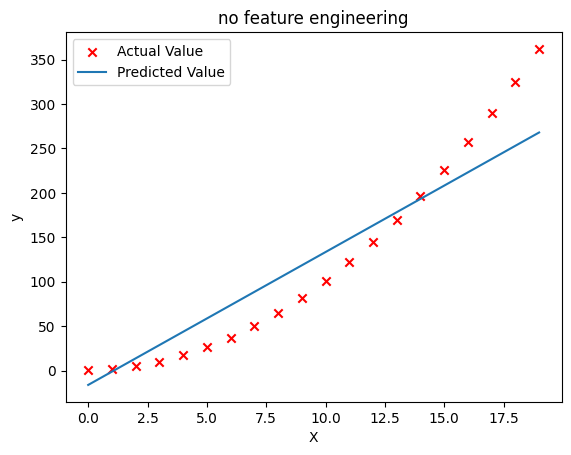

In [ ]:
w_norm = sgdr.coef_
b_norm = sgdr.intercept_[0]
print(w_norm,b_norm)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("no feature engineering")
plt.plot(x,X@w_norm + b_norm, label="Predicted Value");  plt.xlabel("X"); plt.ylabel("y"); plt.legend(); plt.show()


In [ ]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features 
X = x**2      #<-- added engineered feature
X= X.reshape(-1,1)
X.shape,y.shape
print(X,y)

[[  0]
 [  1]
 [  4]
 [  9]
 [ 16]
 [ 25]
 [ 36]
 [ 49]
 [ 64]
 [ 81]
 [100]
 [121]
 [144]
 [169]
 [196]
 [225]
 [256]
 [289]
 [324]
 [361]] [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]


[1.95032135e+10 6.71291706e+10 2.10007042e+11 4.48136827e+11
 7.81518527e+11 1.21015214e+12 1.73403767e+12 2.35317511e+12
 3.06756447e+12 3.87720574e+12 4.78209892e+12 5.78224402e+12
 6.87764104e+12 8.06828997e+12 9.35419081e+12 1.07353436e+13
 1.22117482e+13 1.37834048e+13 1.54503133e+13 1.72124737e+13]
[4.76259571e+10] 19503213501.317284


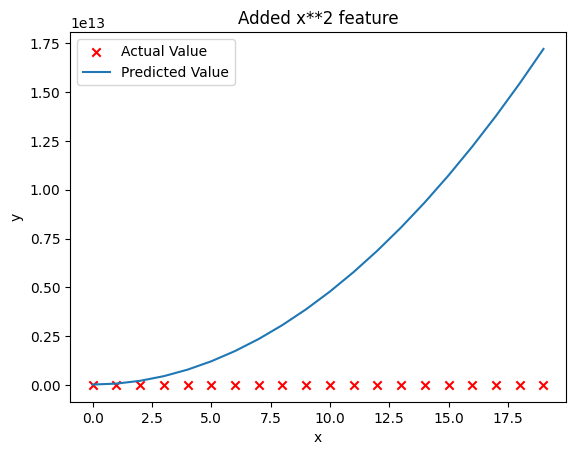

In [ ]:
sgdr_2 = SGDRegressor(max_iter=10000)
sgdr_2.fit(X,y)
pred = sgdr_2.predict(X)
print(pred)
w_norm = sgdr_2.coef_
b_norm = sgdr_2.intercept_[0]
print(w_norm,b_norm)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Added x**2 feature")
plt.plot(x,sgdr_2.predict(X), label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()